<a href="https://colab.research.google.com/github/GabbyOti/BloggerProject/blob/main/WeatherPredictionModel_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Loading and Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/WeatherDataset.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


**HANDLING DATE AND TIME COLUM FROM CATEGORICAL TO NUMERICAL**

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour


**HANDLING WEATHER COLUM FROM CATEGORICAL TO NUMERICAL**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Weather'], drop_first=True)


**SCALING MY DATA USING STANDARD SCALER**

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


 **CHECKING FOR OUTLIERS IN DATA**

In [ ]:
import pandas as pd
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Print the number of outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Number of outliers in '{col}':", len(outliers))



Number of outliers in 'Temp_C': 0
Number of outliers in 'Dew Point Temp_C': 0
Number of outliers in 'Rel Hum_%': 2
Number of outliers in 'Wind Speed_km/h': 162
Number of outliers in 'Visibility_km': 3539
Number of outliers in 'Press_kPa': 207


**CHECKING FOR OUTLIERS IN DATASE COLUMS USING Box Plots**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 10))

# Plot a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


NameError: name 'numerical_cols' is not defined

**IMPUTING OUTLIERS WITH MEDIAN FOR THE SPECIFIC COLUMN**

In [ ]:
numerical_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()

    # Identify outliers
    outliers_condition = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

    # Impute outliers with the median of the column
    df.loc[outliers_condition, col] = median

    # Optionally, print out the number of outliers replaced
    print(f"Number of outliers replaced in '{col}':", outliers_condition.sum())


Number of outliers replaced in 'Temp_C': 0
Number of outliers replaced in 'Dew Point Temp_C': 0
Number of outliers replaced in 'Rel Hum_%': 2
Number of outliers replaced in 'Wind Speed_km/h': 162
Number of outliers replaced in 'Visibility_km': 3539
Number of outliers replaced in 'Press_kPa': 207


**Rechecking summary stats for the dataset**

In [ ]:
#checking the updated summary statistics for the numerical columns
print(df.describe())


             Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8.784000e+03      8.784000e+03  8784.000000      8784.000000   
mean  -5.176996e-17     -3.882747e-17     0.000673        -0.063171   
std    1.000057e+00      1.000057e+00     0.999084         0.892909   
min   -2.746432e+00     -2.853704e+00    -2.862745        -1.720203   
25%   -7.442442e-01     -7.769658e-01    -0.675715        -0.684315   
50%    4.294056e-02      6.843184e-02     0.033592        -0.223921   
75%    8.557944e-01      8.495058e-01     0.802008         0.466671   
max    2.070797e+00      2.007333e+00     1.925078         2.308249   

       Visibility_km    Press_kPa    Year        Month          Day  \
count    8784.000000  8784.000000  8784.0  8784.000000  8784.000000   
mean       -0.226690     0.013771  2012.0     6.513661    15.756831   
std         0.029476     0.894188     0.0     3.451430     8.812031   
min        -0.282400    -2.407260  2012.0     1.000000     1.000000   
25%  

**Inspecting if outliers have been reduced in dataset**

In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Remaining outliers in '{col}':", len(outliers))


Remaining outliers in 'Temp_C': 0
Remaining outliers in 'Dew Point Temp_C': 0
Remaining outliers in 'Rel Hum_%': 0
Remaining outliers in 'Wind Speed_km/h': 53
Remaining outliers in 'Visibility_km': 1921
Remaining outliers in 'Press_kPa': 59



1. **LINEARITY**

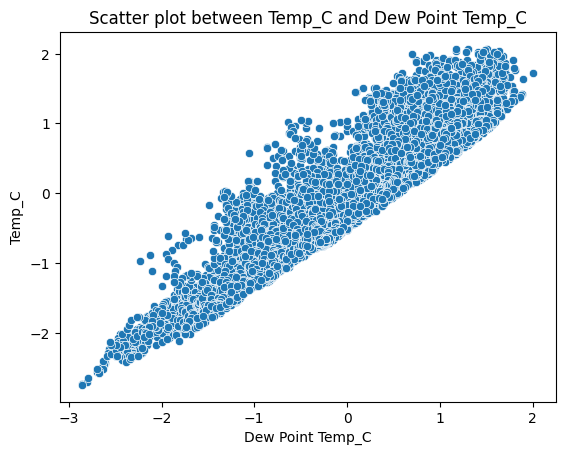

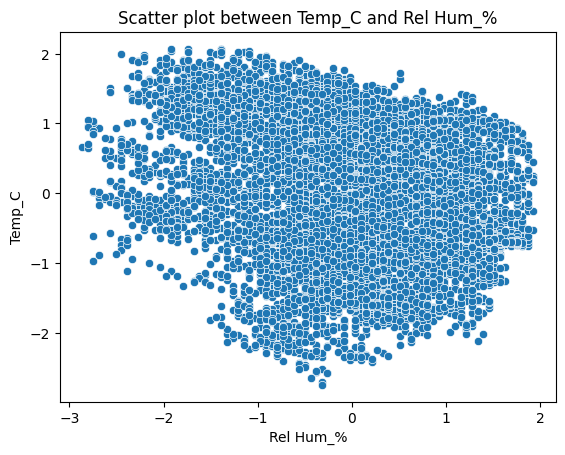

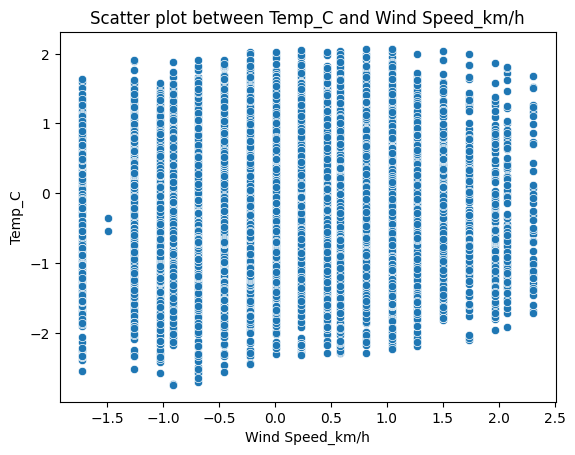

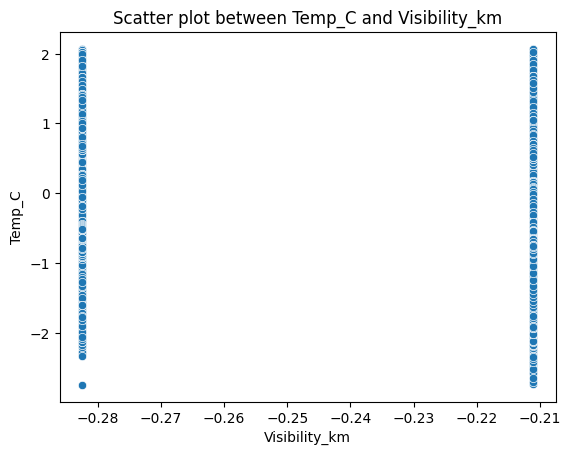

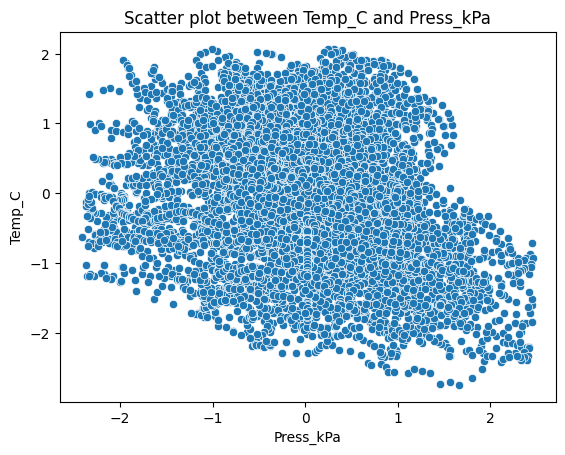

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#'Temp_C' is the dependent variable and others are independent variables
independent_vars = ['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

for var in independent_vars:
    sns.scatterplot(x=df[var], y=df['Temp_C'])
    plt.xlabel(var)
    plt.ylabel('Temp_C')
    plt.title(f'Scatter plot between Temp_C and {var}')
    plt.show()


**Correlation matrix**

In [ ]:
corr_matrix = df[independent_vars + ['Temp_C']].corr()
print(corr_matrix)


                  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
Dew Point Temp_C          1.000000   0.139057        -0.090190      -0.135254   
Rel Hum_%                 0.139057   1.000000        -0.124624       0.000394   
Wind Speed_km/h          -0.090190  -0.124624         1.000000      -0.123731   
Visibility_km            -0.135254   0.000394        -0.123731       1.000000   
Press_kPa                -0.340074  -0.207763        -0.271196       0.113536   
Temp_C                    0.932714  -0.219860        -0.044774      -0.118472   

                  Press_kPa    Temp_C  
Dew Point Temp_C  -0.340074  0.932714  
Rel Hum_%         -0.207763 -0.219860  
Wind Speed_km/h   -0.271196 -0.044774  
Visibility_km      0.113536 -0.118472  
Press_kPa          1.000000 -0.261664  
Temp_C            -0.261664  1.000000  


**Developing a Multiple Regression Model**

In [ ]:
import statsmodels.api as sm

#'Temp_C' is the dependent variable
X = df[independent_vars] # Independent variables
y = df['Temp_C']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Temp_C   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.347e+05
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:04:30   Log-Likelihood:                 10618.
No. Observations:                8784   AIC:                        -2.122e+04
Df Residuals:                    8778   BIC:                        -2.118e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1163      0.006  

3.**Homoscedasticity**
The variance of error terms should be constant across all levels of the independent variables. This can be visually inspected using a scatter plot of residuals after model fitting.

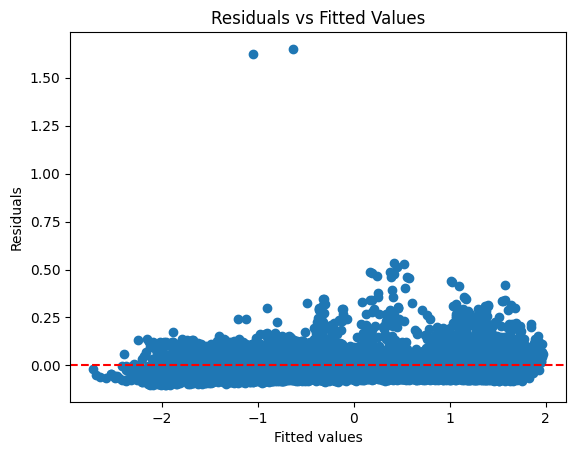

In [ ]:
# Calculate residuals
residuals = model.resid

# Plot residuals
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


4. **Normality of Residuals**
The residuals should be normally distributed. This can be checked with a Q-Q plot or a Shapiro-Wilk test after fitting the model.

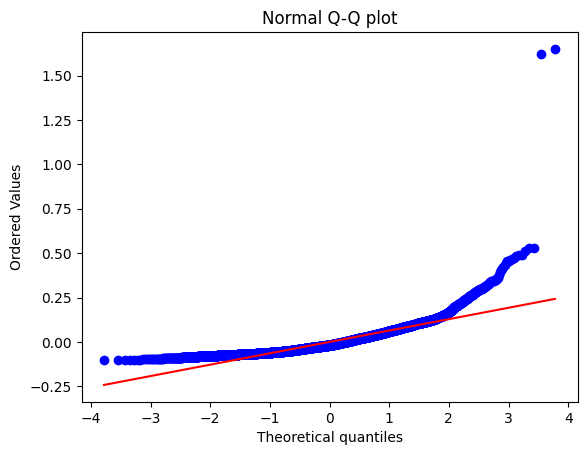

Shapiro-Wilk test: Statistic=0.7884193658828735, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Shapiro-Wilk test
from scipy import stats
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={shapiro_test[0]}, p-value={shapiro_test[1]}")


**Splitting the Dataset into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Creating and Training the Multiple Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

Model Performance, Interpretability, Accuracy, and Complexity
1. **Model Performance and Interpretability:**

In [ ]:
# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)

# R-squared value
print("R-squared:", model.score(X_test, y_test))


Coefficients: [ 0.00000000e+00  9.82469783e-01 -3.56670527e-01  8.14518631e-04
  4.95951295e-01 -3.68603862e-03]
Intercept: 0.11248329243850994
R-squared: 0.9941934321264801


2. **Model Accuracy:
MSE AND R-SQUARED BEFORE FEATURE SELECTION**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the testing set
y_pred_before_fs = model.predict(X_test)

# Evaluate model performance before feature selection
mse_before_fs = mean_squared_error(y_test, y_pred_before_fs)
r2_before_fs = r2_score(y_test, y_pred_before_fs)

print("Before feature selection:")
print("Mean Squared Error:", mse_before_fs)
print("R-squared:", r2_before_fs)


Before feature selection:
Mean Squared Error: 0.006156542032683798
R-squared: 0.9941934321264801


**After Feature Selection: MSE AND R-SQUARED VALUES**

In [ ]:
from sklearn.linear_model import LassoCV

# Fitting Lasso regression model
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

# Selecting features with non-zero coefficients
selected_features = X_train.columns[lasso_model.coef_ != 0]

# Retraining the model with selected features
model_after_fs = LinearRegression()
model_after_fs.fit(X_train[selected_features], y_train)

# Making predictions on the testing set
y_pred_after_fs = model_after_fs.predict(X_test[selected_features])

# Evaluating model performance after feature selection
mse_after_fs = mean_squared_error(y_test, y_pred_after_fs)
r2_after_fs = r2_score(y_test, y_pred_after_fs)

print("\nAfter feature selection:")
print("Mean Squared Error:", mse_after_fs)
print("R-squared:", r2_after_fs)



After feature selection:
Mean Squared Error: 0.006429171434265481
R-squared: 0.9939363005879968
